In [6]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from math import pi, sin, sqrt
from time import time
from tqdm import tqdm
%matplotlib inline

# rc('text', usetex=False)

In [7]:
def p_plot(pmap):
    npi = np.linspace(-2, 2, len(pmap))

    plt.figure(figsize=(8,5))
    plt.pcolor(npi, npi, pmap, cmap='Blues')
    # plt.title(r"$(A_{rms}^2 / A_{max})$", fontsize=24)
    # plt.xlabel("$\phi_1 / \pi$", fontsize=25)
    # plt.ylabel("$\phi_2 / \pi$", fontsize=25)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    plt.subplots_adjust(top = 1.1, bottom = 0, right = 1, left = 0, 
                hspace = 0, wspace = 0)
    plt.margins(0,0)

    #plt.savefig("phase_map.png", bbox_inches = 'tight',
        #pad_inches = 0)

    plt.show()

In [9]:
phi = np.random.default_rng().uniform(high=2*pi, size=30)

def power_iter(T, sep, c, p1, p2, res=500, M=1000):
    """ For a given parameter configuration,
        takes a random sample of phases, 
        then graphs the score landscape for varying 2 relative phases.
        
        ==INPUTS==
            M - samples per 1Hz
    """
    N = int((2 - T % 2) / sep)
    
    samples = np.linspace(0, N*2*pi, N*M)
    f = np.array([c + (n - (T - 1) / 2) * sep for n in range(T)])
    
    ## Constant ##
    freqs = np.concatenate((f[:p1], f[p1:p2], f[p2:]))
    waves = np.sin(np.add(np.outer(samples, freqs), phi[:len(freqs)])).sum(axis=1)
    
    ## Mapped Over ##
    w1 = np.multiply(freqs[p1], samples)
    w2 = np.multiply(freqs[p2], samples)
   
    phase_map = np.linspace(-pi, pi, res)
    
    scores = np.empty((res, res))
    
    for i, dp1 in tqdm(enumerate(phase_map)):
        for j, dp2 in enumerate(phase_map):
            DoF = np.add(
                np.sin(np.add(w1, dp1)),
                np.sin(np.add(w2, dp2)))
            
            form = np.add(waves, DoF)
            form = np.divide(form, form.max())  

            scores[i, j] = form.dot(form) / len(form)
    
    return scores

50it [00:00, 1671.50it/s]


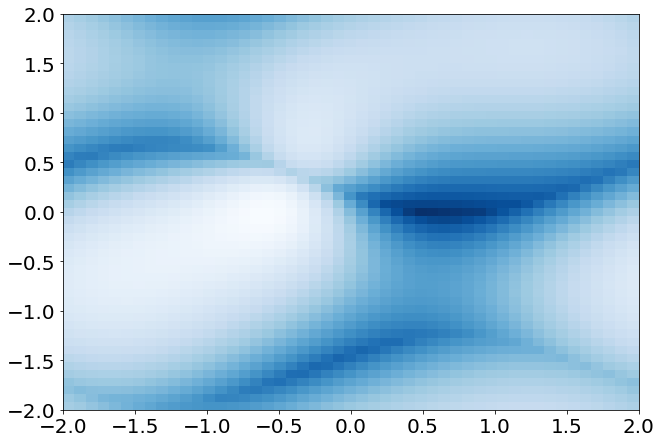

50it [00:00, 1564.97it/s]


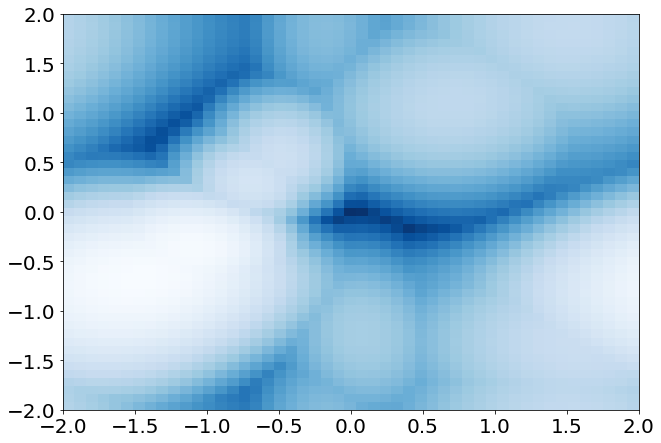

50it [00:00, 672.55it/s]


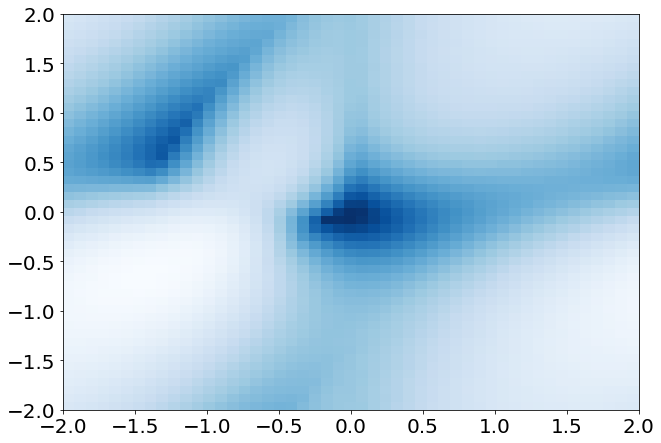

50it [00:00, 95.30it/s]


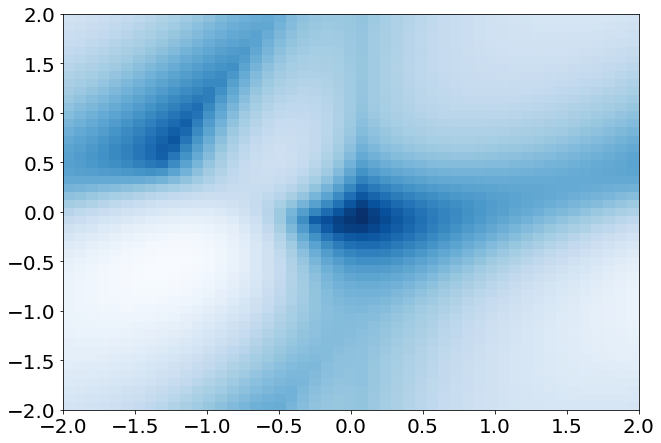

500it [00:02, 211.37it/s]


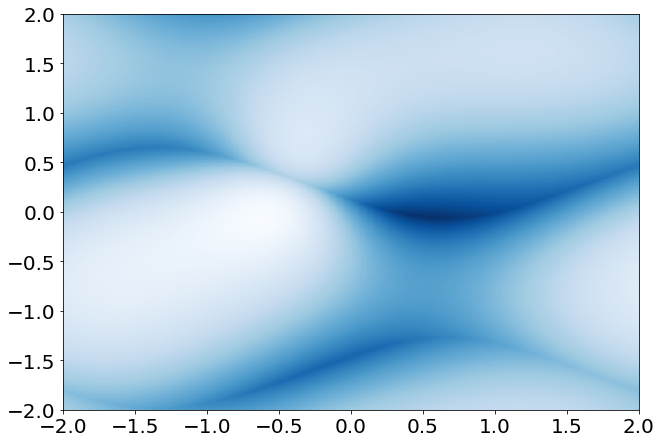

500it [00:02, 180.52it/s]


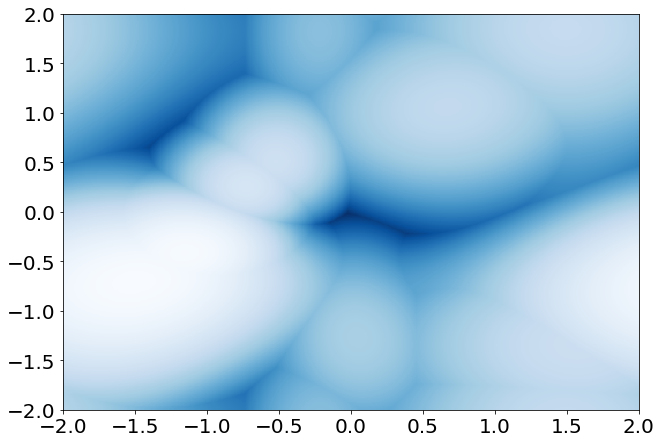

500it [00:07, 69.18it/s]


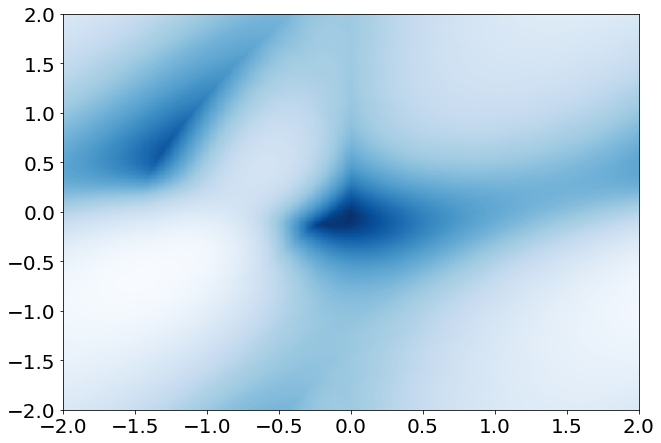

500it [00:53,  9.41it/s]


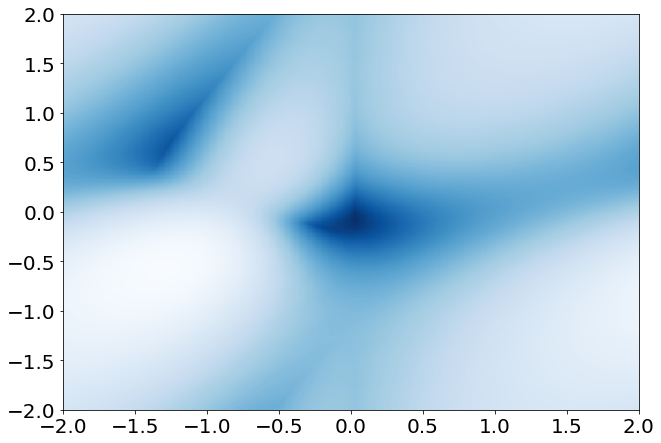

In [10]:
T, sep, c = 5, 1, 90

res = [50, 500]
M = [10, 100, 1000, 10000]
for r in res:
    for m in M:
        p_plot(power_iter(T, sep, c, 0, 1, res=r, M=m))

In [25]:
def power_iter(T, sep, c, p1=0, p2=1, res=500, N=1000):
    """ For a given parameter configuration,
        creates a graph of the phase landscape.
    """
    
    samples = np.linspace(0, 2 * pi, N)
    f = np.array([c + (n - (T - 1) / 2) * sep for n in range(T)])
    
    ## Constant ##
    freqs = np.concatenate((f[:p1], f[p1:p2], f[p2:]))
    phases_samp = np.random.default_rng().uniform(high=2*pi, size=T-2)
    waves = np.sin(np.add(np.outer(samples, freqs), phases_samp)).sum(axis=1)
    
    ## Mapped Over ##
    w1 = np.multiply(f[p1], samples)
    w2 = np.multiply(f[p2], samples)
    
    
    scores = np.empty((res, res))
    phi = np.linspace(0, 2*pi, res)
    for i, p in tqdm(enumerate(phi)):
        for j, q in enumerate(phi):
            wav = np.add(np.sin(np.add(w1, p)), np.sin(np.add(w2, q)))
            
            form = np.add(waves, wav)
            form = np.divide(form, form.max())  

            scores[i, j] = form.dot(form) / len(form)
            
            w1 = np.add(w1, inc)
        w1 = np.add(w1, -2*pi)
        w2 = np.add(w2, inc)
    
    return scores

In [11]:
p_plot(pmap)
p_plot(pmap_dif)


NameError: name 'pmap' is not defined

In [ ]:
def pmute(a):
    return np.concatenate((a[1:]), a[0:1])

def compute_phase_map(freqs, N):
    """ ==INPUTS==
        freqs - List of frequencies. Assumed to be positive integers.
        N ----- Samples per 1Hz wave.
        res --- Samples per phase. [0, 2pi]
    """
    assert len(freqs) == 5
    dat = N**(4)
    print(dat)
    assert dat < 1E10
   
    samples = np.linspace(0, 2*pi, N)  # 1 Hertz
    
    block = np.sin(np.outer(freqs, samples))  # The Waves
    
    score = np.empty((N,)*4, dtype=float)  # Output
   
    for i in tqdm(range(N)):
        for j in range(N):
            for k in range(N):
                for l in range(N):
                    form = block.sum(axis=1)
                    norm = np.divide(form, form.max())
                    
                    score[i,j,k,l] = norm.dot(norm) / N
                
                    block[0] = pmute(block[0])
                block[1] = pmute(block[1])
            block[2] = pmute(block[2])
        block[3] = pmute(block[3])
        
    return score
                

In [7]:
def pmute(a):
    return np.concatenate(((a[1:]), a[0:1]))

def pmap_3(freqs, N):
    """ ==INPUTS==
        freqs - List of frequencies. Assumed to be positive integers.
        N ----- Samples per 1Hz wave.
        res --- Samples per phase. [0, 2pi]
    """
    samples = np.linspace(0, 2*pi, N)  # 1 Hertz
    
    rock = np.outer(freqs, samples)  # The Phases
    block = np.sin(rock)  # The Waves
    
    score = np.empty((N,)*2, dtype=float)  # Output
   
    for i in tqdm(range(N)):
        for j in range(N):
            form = block.sum(axis=0)
            norm = np.divide(form, form.max())

            score[i,j] = norm.dot(norm) / N

            rock[0] = np.add(rock[0], samples[1])
            block[0] = np.sin(rock[0]) 
        rock[1] = np.add(rock[1], samples[1])
        block[1] = np.sin(rock[1])
         
    return score
                

In [9]:
s3 = pmap_3([89, 91, 95], 1000)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:22<00:00, 44.35it/s]


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:26<00:00, 38.08it/s]


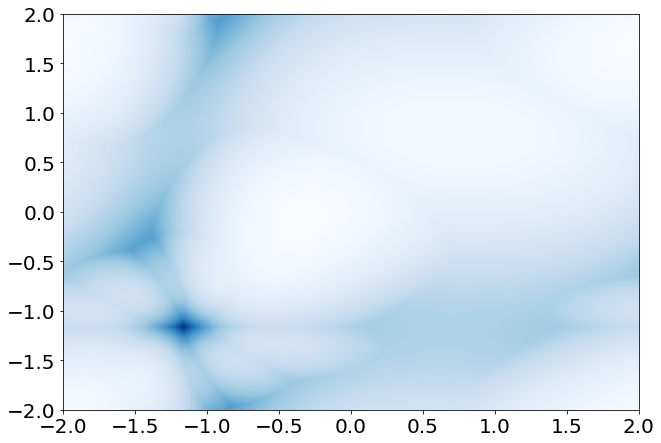

In [27]:
p_plot(power_iter(3, 2, 91, res=1000, N=1000))

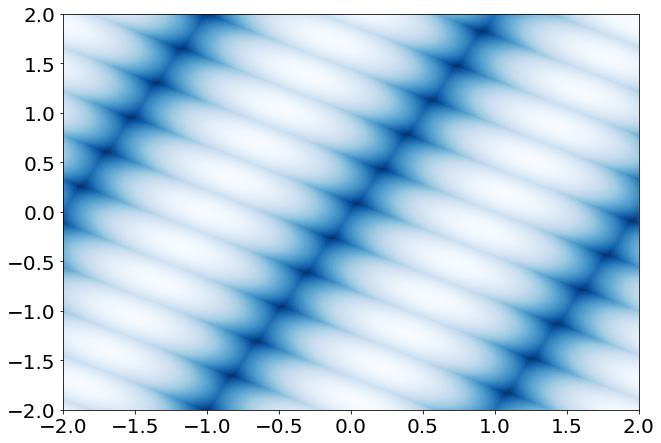

In [10]:
p_plot(s3)

In [ ]:
f = [87, 89, 91, 93, 95]

s = compute_phase_map(f, 100)

In [108]:
def dig(f):
    i = 0
    while (f % 1):
        f = f * 10
        i += 1
    N = (f % 10) / 10 ** i
    return N if N else 1

In [111]:
ntraps = np.arange(3, 20)
separations = [1, 0.5, 0.1]
centers = [80, 85, 90, 95, 100]

for T in ntraps:
    for sep in separations:
        for c in centers:
            N = int((2 - T % 2) / min(dig(sep), dig(c)))
    

1
1
1
1
1
2
2
2
2
2
10
10
10
10
10
2
2
2
2
2
4
4
4
4
4
20
20
20
20
20
1
1
1
1
1
2
2
2
2
2
10
10
10
10
10
2
2
2
2
2
4
4
4
4
4
20
20
20
20
20
1
1
1
1
1
2
2
2
2
2
10
10
10
10
10
2
2
2
2
2
4
4
4
4
4
20
20
20
20
20
1
1
1
1
1
2
2
2
2
2
10
10
10
10
10
2
2
2
2
2
4
4
4
4
4
20
20
20
20
20
1
1
1
1
1
2
2
2
2
2
10
10
10
10
10
2
2
2
2
2
4
4
4
4
4
20
20
20
20
20
1
1
1
1
1
2
2
2
2
2
10
10
10
10
10
2
2
2
2
2
4
4
4
4
4
20
20
20
20
20
1
1
1
1
1
2
2
2
2
2
10
10
10
10
10
2
2
2
2
2
4
4
4
4
4
20
20
20
20
20
1
1
1
1
1
2
2
2
2
2
10
10
10
10
10
2
2
2
2
2
4
4
4
4
4
20
20
20
20
20
1
1
1
1
1
2
2
2
2
2
10
10
10
10
10


In [113]:
ntraps = np.arange(3, 20)
separations = [1, 0.5, 0.1]  # MHz
centers = [80, 85, 90, 95, 100]  # Mhz

for T in ntraps:
    for sep in separations:
        for c in centers:
            name = '%d/%.1f/%.1f' % (T, sep, c)
            

In [121]:
name = '%d/%.1f/%.1f' % (9, 1, 92)
name1 = '%d/%.1f/%.1f' % (88, 0.1, 88)

rolls = 120000

lumpy = np.arange(rolls)

with h5py.File('Test.hdf5', 'w') as h:
    h.create_dataset(name, data=lumpy)
    h.create_dataset(name1, data=np.ones(rolls))
    
with h5py.File('Test.hdf5', 'r') as b:
    print(b.keys())
    print(b.items())
    print(b.values())
    for k in b.keys():
        print(k)
        print(b[k].keys())

<KeysViewHDF5 ['88', '9']>
ItemsViewHDF5(<HDF5 file "Test.hdf5" (mode r)>)
ValuesViewHDF5(<HDF5 file "Test.hdf5" (mode r)>)
88
<KeysViewHDF5 ['0.1']>
9
<KeysViewHDF5 ['1.0']>
